In [1]:
import pandas as pd

import scanpy as sc
import scFates as scf

import palantir

import rpy2

In [2]:
# Load ATAC data
atac = sc.read_h5ad("../fibroblast_reanalysis/data/scATAC_PeakMatrix_fibro.processed.h5ad")

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


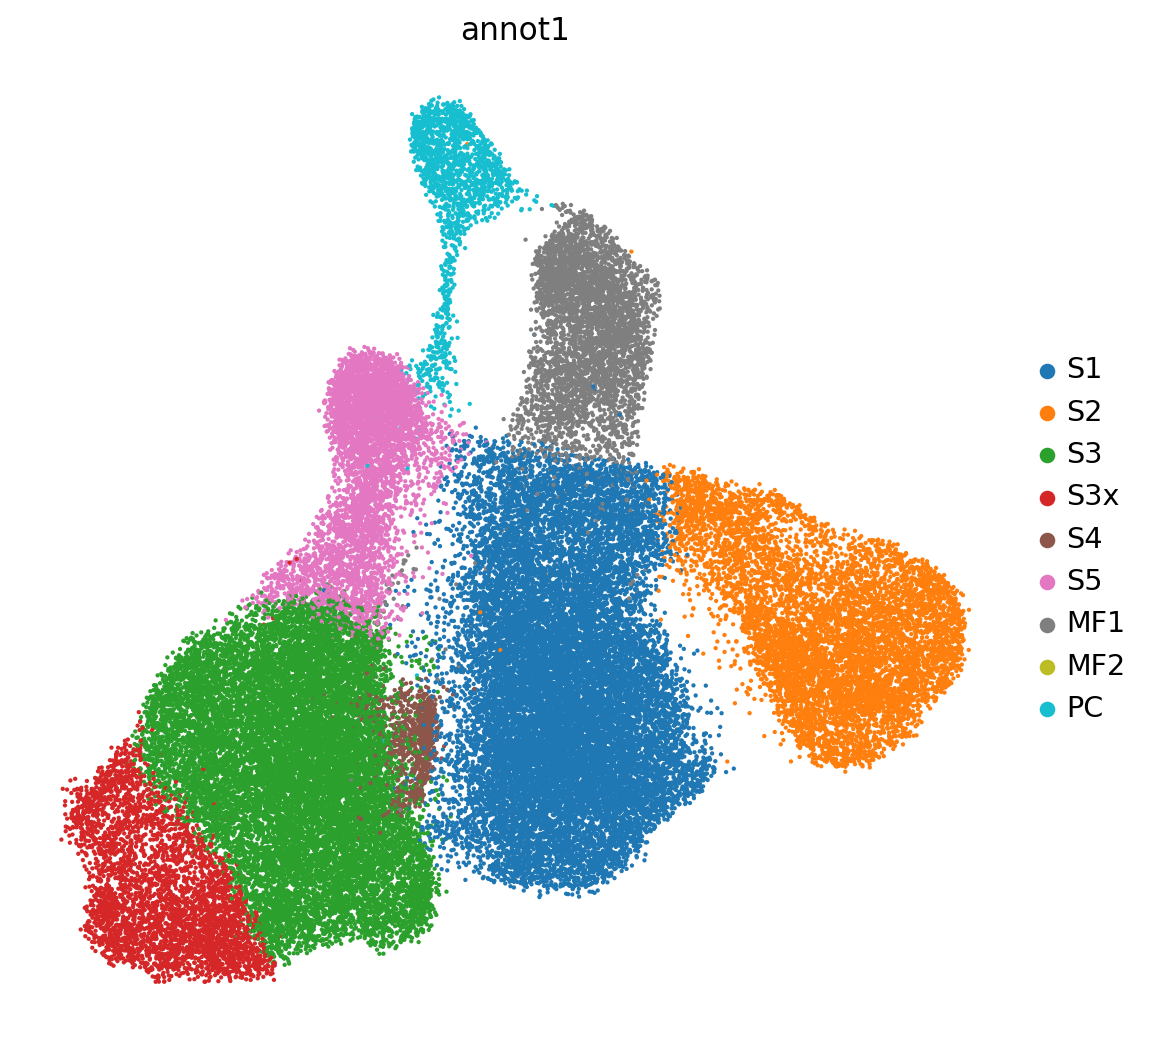

In [3]:
# Set up cell colors and check agreement of UMAP coordinates
sc.set_figure_params(dpi_save=300, figsize=(8, 8))

# without outline
sc.pl.umap(
    atac,
    color='annot1',
    palette='tab10',
    #palette=sc.plotting.palettes.vega_10_scanpy,  # color blind adjusted, vega10 same as tab10?
    frameon=False,
    size=15,  # point size
    #legend_loc='on data',
    #save='UMAP_ATAC_fibroblast_MF_PC.pdf'  # in ./figures
)

In [4]:
atac

AnnData object with n_obs × n_vars = 56689 × 407383
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 

In [5]:
atac.obsm['X_pca'].shape

(56689, 30)

In [6]:
atac

AnnData object with n_obs × n_vars = 56689 × 407383
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 

In [7]:
# scFates graph on pca representation
scf.tl.tree(atac,
            method="ppt",  # ppt, epg
            Nodes=50,
            use_rep="pca",
            ndims_rep=30,
            
            #weight_rep='neighbors',  # nearest neighbnor 
            
            device="cpu", seed=1,
            ppt_lambda=100,  # penalty for tree length
            ppt_sigma=0.025, ppt_nsteps=200)

inferring a principal tree --> parameters used 
    50 principal points, sigma = 0.025, lambda = 100, metric = euclidean
    fitting:  36%|███▋      | 73/200 [00:15<00:27,  4.67it/s]
    converged
    finished (0:00:15) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/simpleppt/ppt.py:267: RuntimeWarning: divide by zero encountered in log
  sigma / R.shape[0] * np.sum(R * np.log(R)),
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/simpleppt/ppt.py:267: RuntimeWarning: invalid value encountered in multiply
  sigma / R.shape[0] * np.sum(R * np.log(R)),


/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


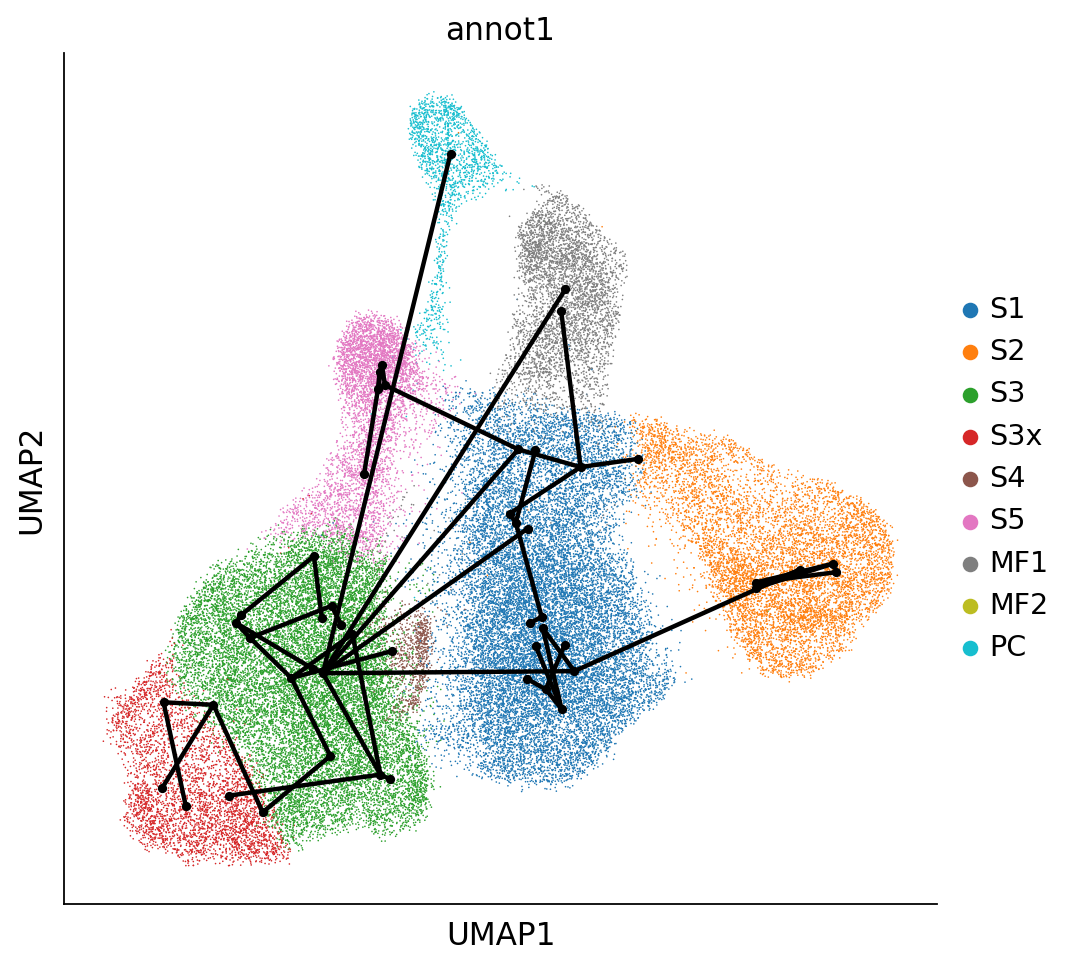

In [8]:
sc.set_figure_params(dpi_save=300, figsize=(7, 7.0))

scf.pl.graph(atac, color_cells="annot1", tips=False, forks=False, size_nodes=10, alpha_seg=1.0, basis="umap",
             save="_ATAC_scFates_PCA_annot.pdf")

In [9]:
# CD34 peaks?
# atac.var.index[atac.var.index.str.contains("CD34")]

#scf.pl.graph(atac, color_cells="chr1:207912287-207912787,CD34,Promoter", tips=False, forks=False, size_nodes=10, alpha_seg=1.0, basis="umap",
#              #save="_ATAC_scFates_PCA_CD34_promoter.pdf"
#             )

In [10]:
#
atac

AnnData object with n_obs × n_vars = 56689 × 407383
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 

In [11]:
atac.uns['neighbors']

OverloadedDict, wrapping:
	{'params': {'method': array(['umap'], dtype=object), 'n_neighbors': array([39])}}
With overloaded keys:
	['connectivities', 'distances'].

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


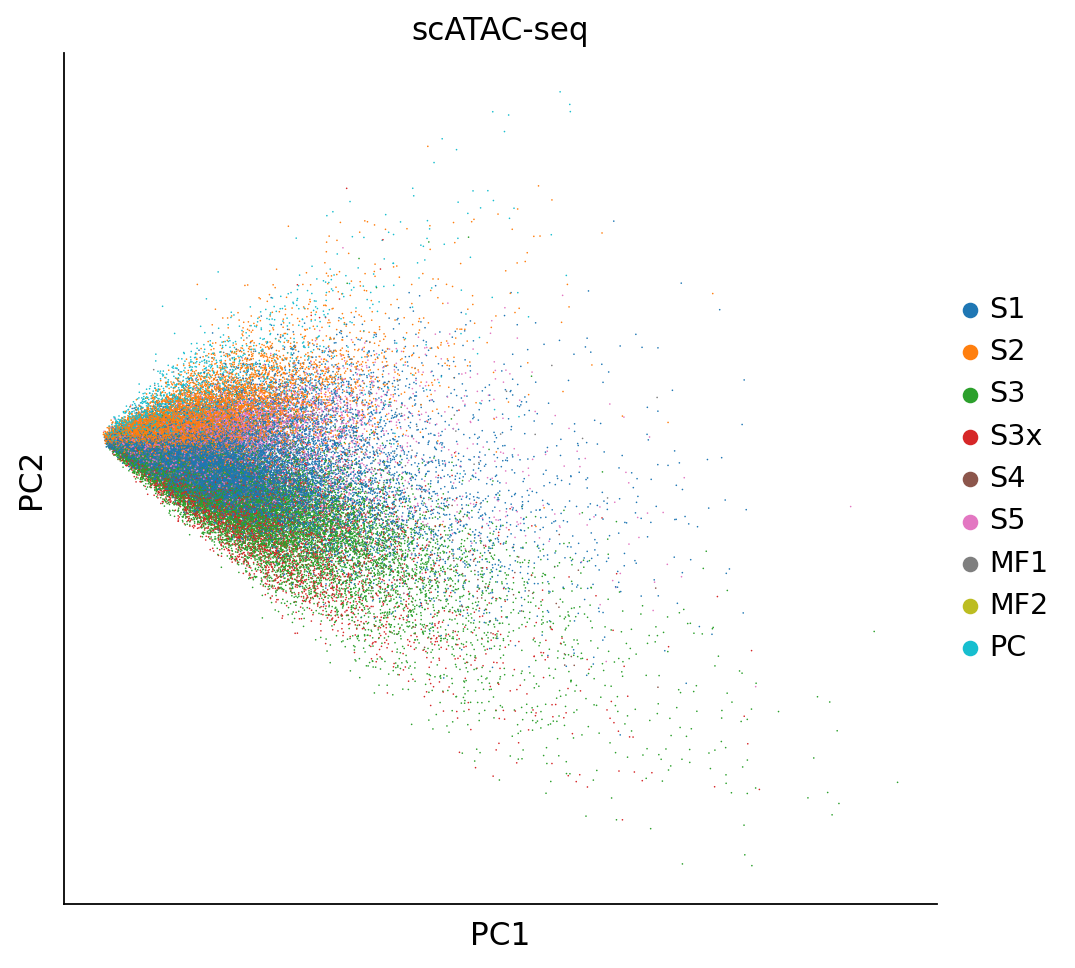

In [12]:
sc.pl.embedding(atac, basis="pca", color="annot1", title="scATAC-seq")

In [13]:
# Recompute PCA
sc.tl.pca(atac, n_comps=30)

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


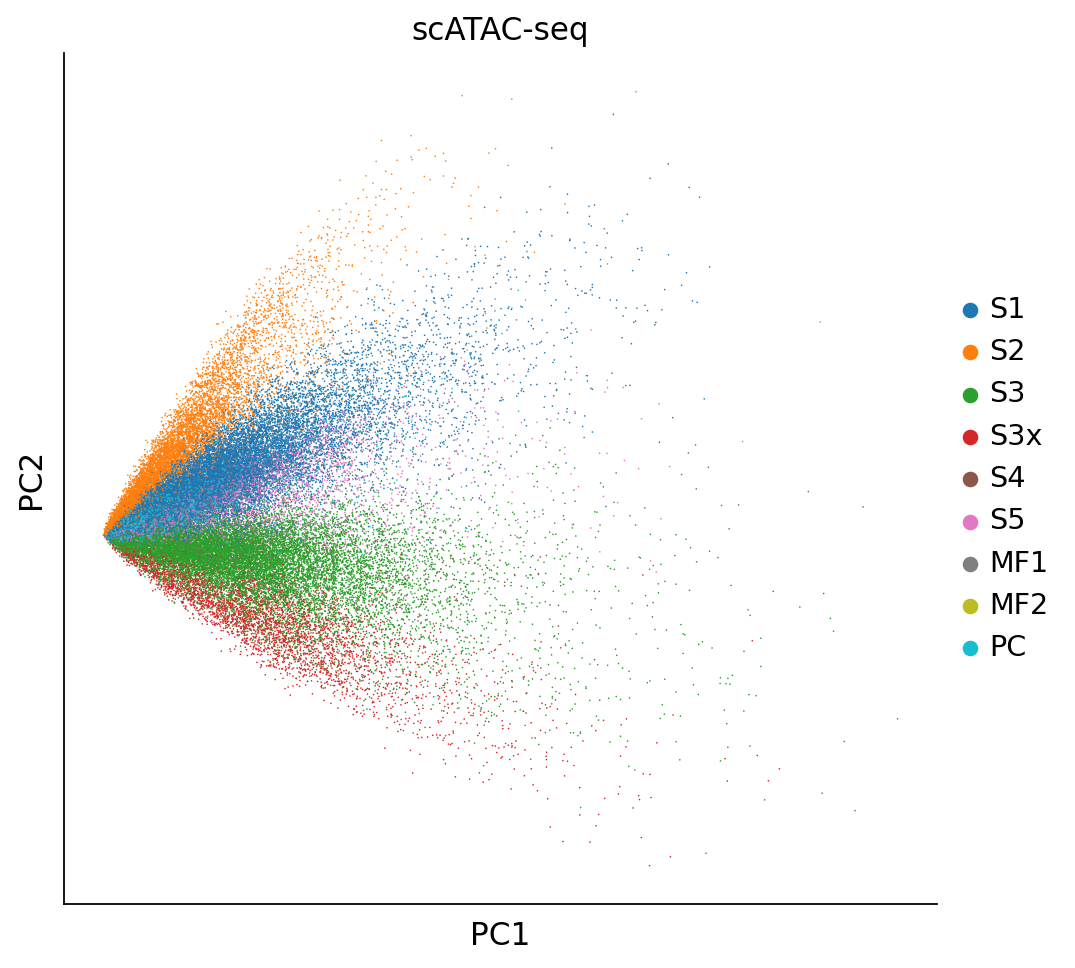

In [14]:
sc.pl.embedding(atac, basis="pca", color="annot1", title="scATAC-seq")

In [15]:
atac.obsm['X_pca'].shape

(56689, 30)

In [18]:
# Exclude 1st principle components due to technical reasons
atac.obsm['X_pca_no1'] = atac.obsm['X_pca'][:, 1:]

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


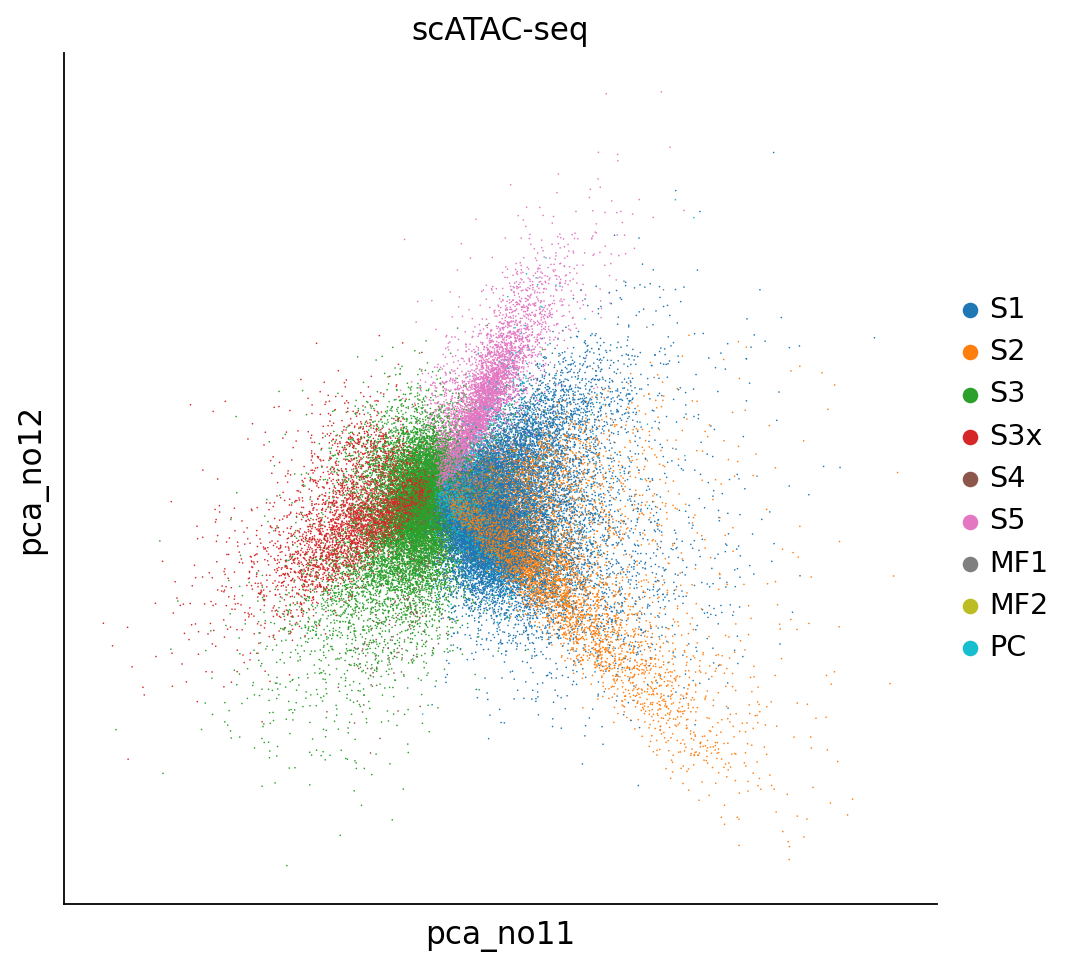

In [21]:
sc.pl.embedding(atac, basis="pca_no1", color="annot1", title="scATAC-seq")

In [26]:
# scFates graph on pca representation
scf.tl.tree(atac,
            method="ppt",  # ppt, epg
            Nodes=50,
            #use_rep="pca_no1",  # without PC1
            use_rep="pca",  # without PC1

            #ndims_rep=30,
            
            #weight_rep='neighbors',  # nearest neighbnor 
            
            device="cpu", seed=1,
            ppt_lambda=100,  # penalty for tree length
            ppt_sigma=0.025, ppt_nsteps=200)

inferring a principal tree --> parameters used 
    50 principal points, sigma = 0.025, lambda = 100, metric = euclidean
    fitting:  26%|██▋       | 53/200 [00:10<00:28,  5.10it/s]
    converged
    finished (0:00:10) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/simpleppt/ppt.py:267: RuntimeWarning: divide by zero encountered in log
  sigma / R.shape[0] * np.sum(R * np.log(R)),
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/simpleppt/ppt.py:267: RuntimeWarning: invalid value encountered in multiply
  sigma / R.shape[0] * np.sum(R * np.log(R)),


/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


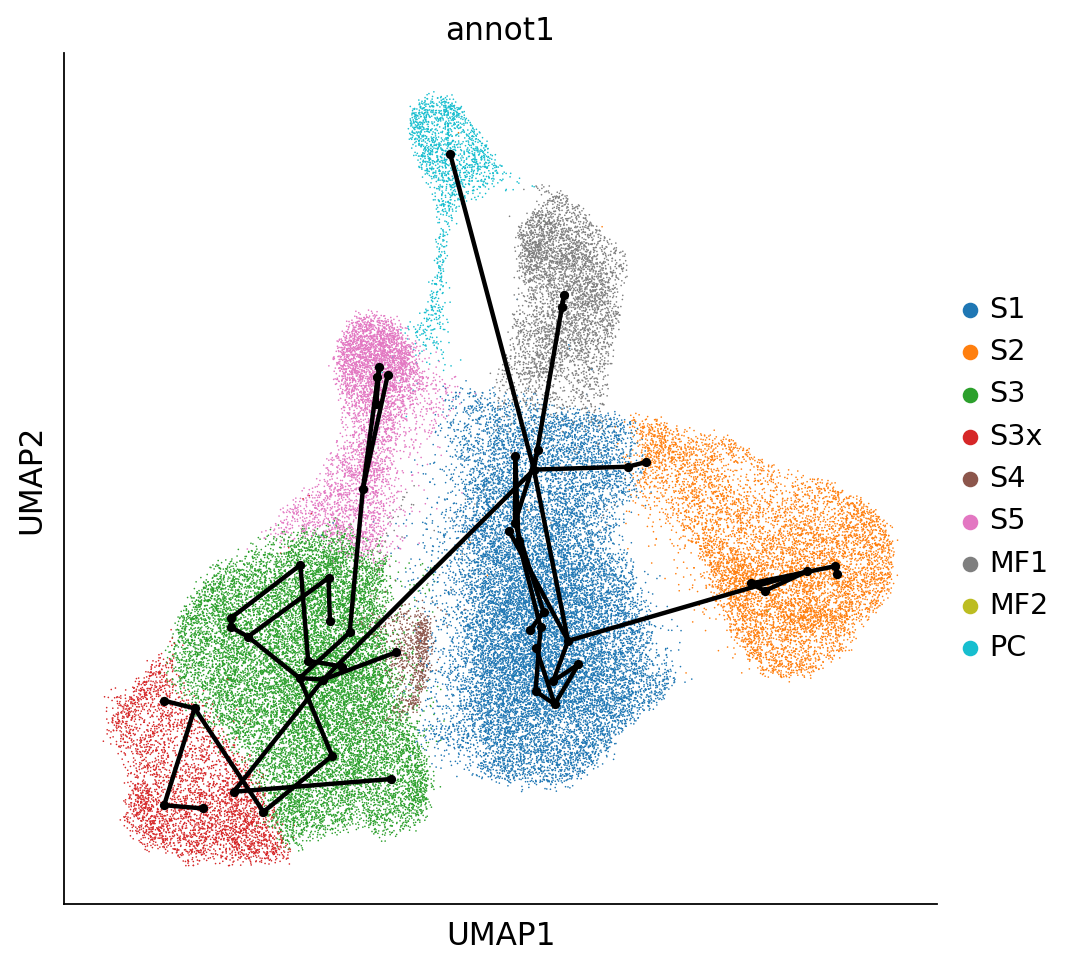

In [27]:
sc.set_figure_params(dpi_save=300, figsize=(7, 7.0))

scf.pl.graph(atac, color_cells="annot1", tips=False, forks=False, size_nodes=10, alpha_seg=1.0, basis="umap",
             #save="_ATAC_scFates_PCA_annot.pdf"
)

# palantir diffussion map

In [28]:
adata = atac.copy()

In [29]:
pca_projections = pd.DataFrame(adata.obsm["X_pca"], index=adata.obs_names)


In [46]:
# Run palantir
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=10)

#ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=4)
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=8)


In [47]:
adata.obsm["X_palantir"] = ms_data.values

In [48]:
sc.pp.neighbors(adata, n_neighbors=30, use_rep="X_palantir")

In [49]:
sc.tl.umap(adata)

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


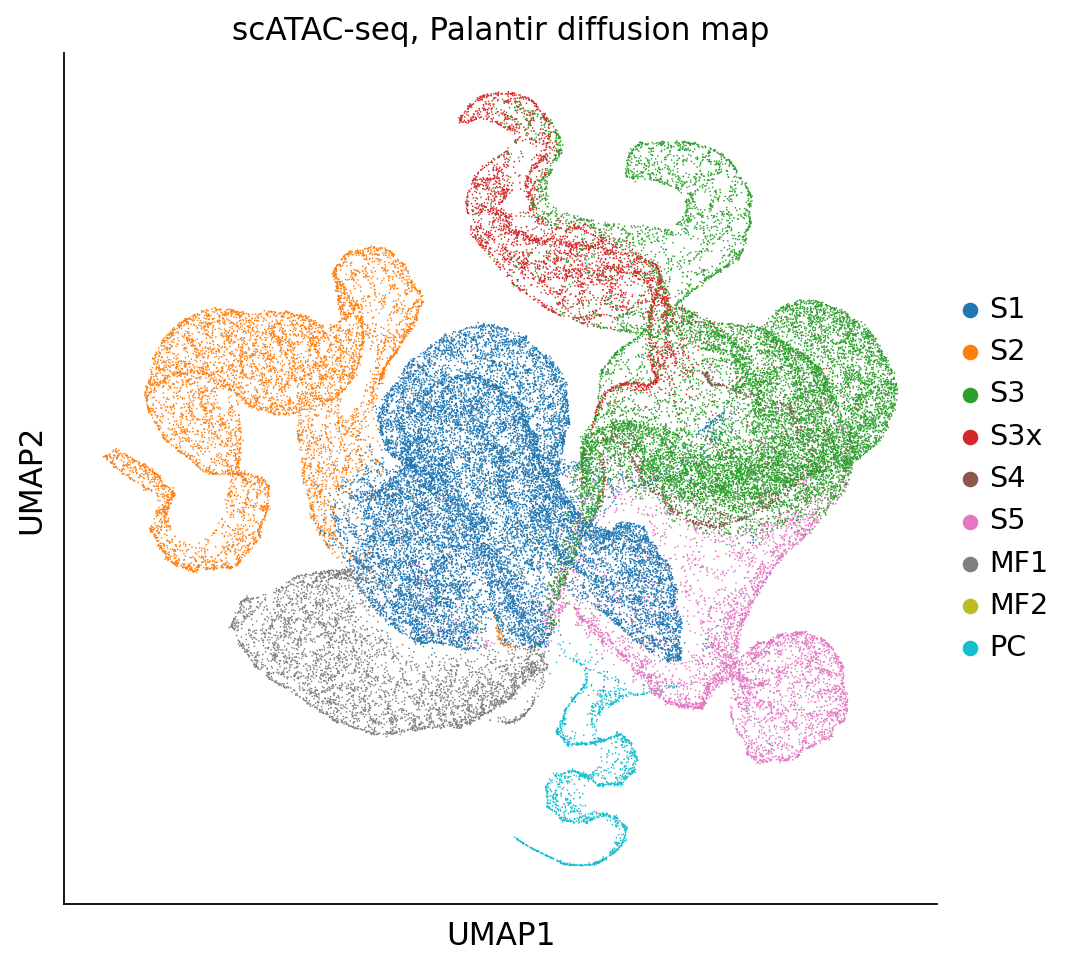

In [50]:
sc.pl.umap(adata, color=["annot1"], title="scATAC-seq, Palantir diffusion map", save="_ATAC_Palantir_diffusion.pdf")

In [23]:
# palantir.plot.plot_diffusion_components(adata)
# plt.show()

In [24]:
#sc.pl.draw_graph(adata, color="CD34",color_map="RdBu_r")


In [36]:
scf.tl.tree(adata, method="ppt", Nodes=500, use_rep="palantir",
            device="cpu", seed=1, ppt_lambda=50, ppt_sigma=0.025, ppt_nsteps=200)

inferring a principal tree --> parameters used 
    500 principal points, sigma = 0.025, lambda = 50, metric = euclidean
    fitting: 100%|██████████| 200/200 [03:39<00:00,  1.10s/it]
    not converged (error: 0.021363114415469685)
    finished (0:03:41) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


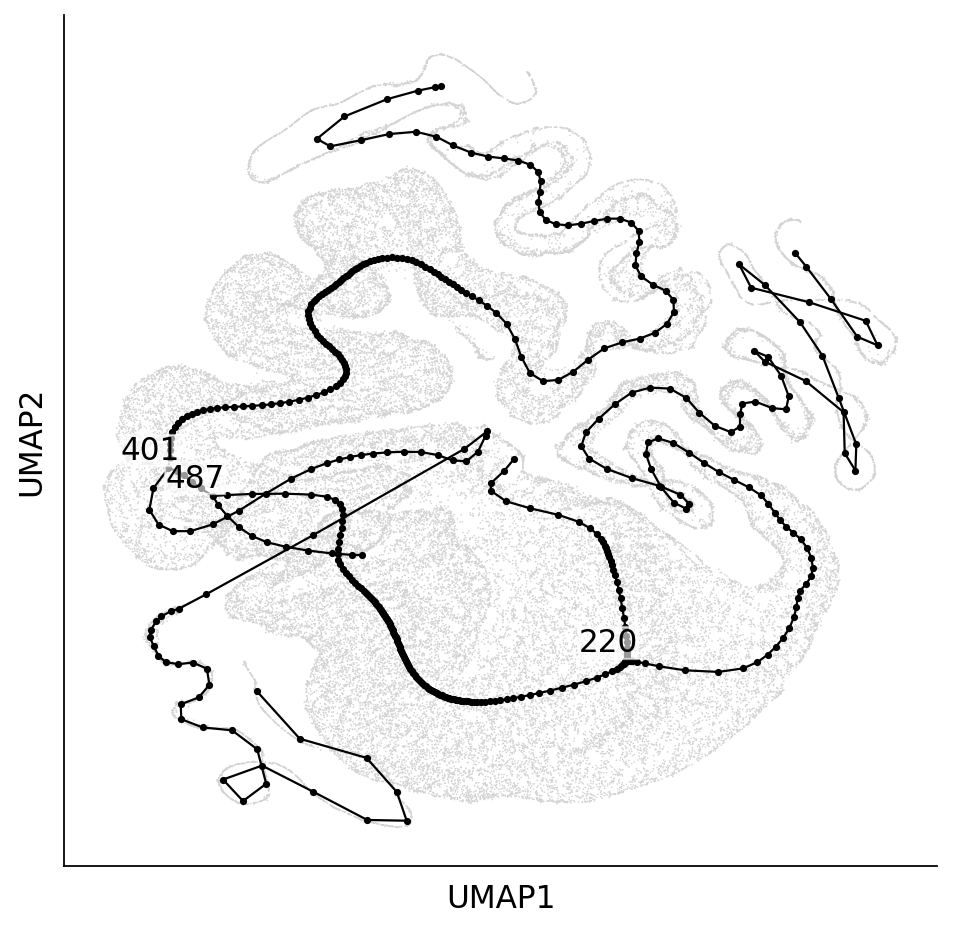

In [37]:
scf.pl.graph(adata, forks=True, tips=False, size_nodes=5, linewidth=1)

In [27]:
scf.tl.root(adata, 337)  # midpoint

node 337 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [28]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Estimate pseudo-time
scf.tl.pseudotime(adata, n_jobs=1, n_map=1, seed=42)  # weird warnings


projecting cells onto the principal graph
    finished (0:00:23) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


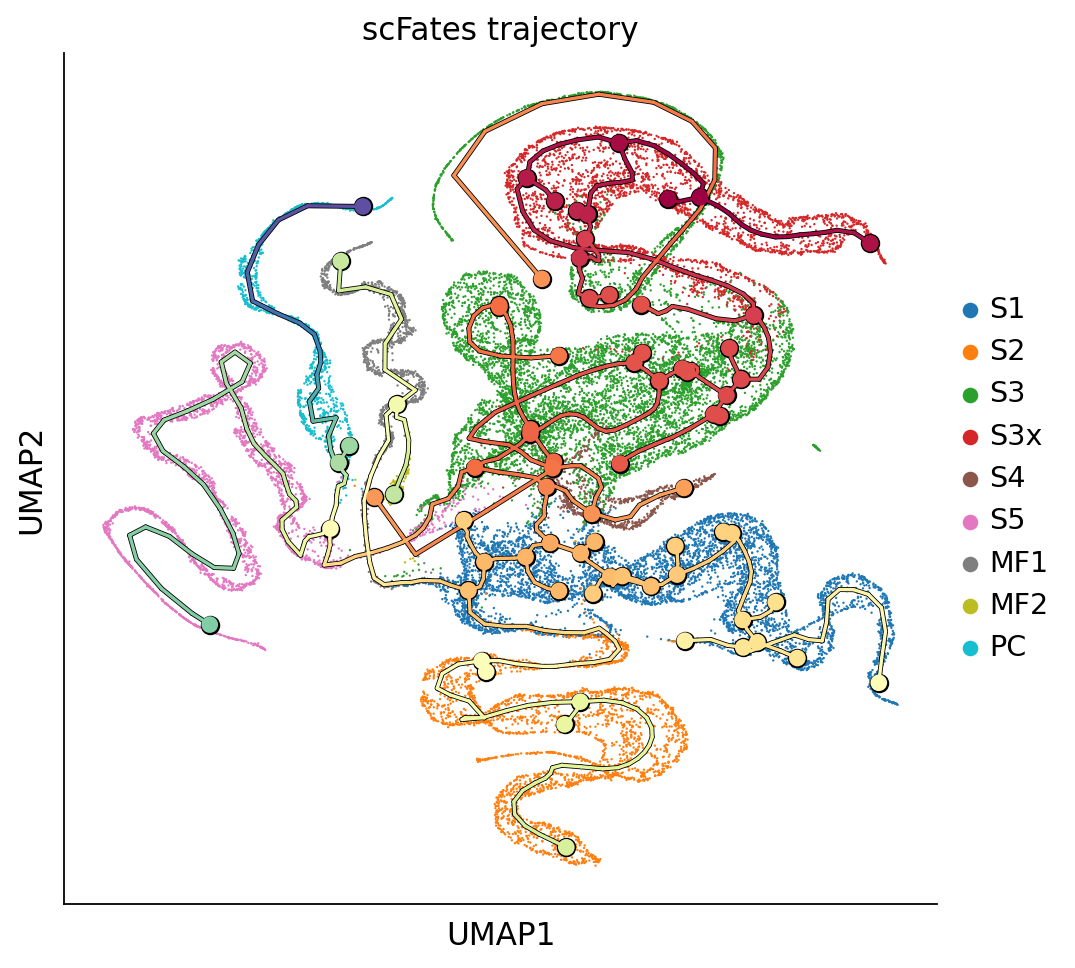

In [29]:

scf.pl.trajectory(adata, scale_path=0.3, color_cells="annot1", cmap_seg="Spectral", save="_ATAC_Palantir_trajectory.pdf", title="scFates trajectory")

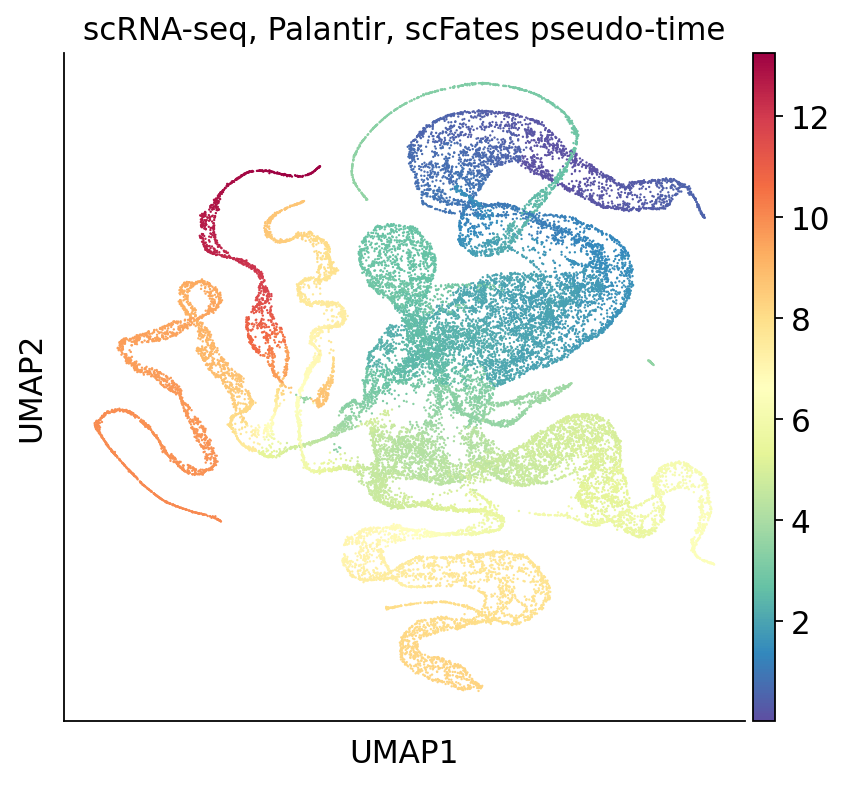

In [30]:
sc.set_figure_params(dpi_save=300, figsize=(6, 5.5))

sc.pl.umap(adata, color=["t"], title="scATAC-seq, Palantir, scFates pseudo-time",
           #save="_RNA_Palantir_diffusion.pdf"
           #color_map="Spectrum_r"

           save="_ATAC_Palantir_scFates_pseudotime.pdf"
)

In [31]:
# Copy pseudo-time estimate to original AnnData object
rna.obs['t'] = adata.obs.t

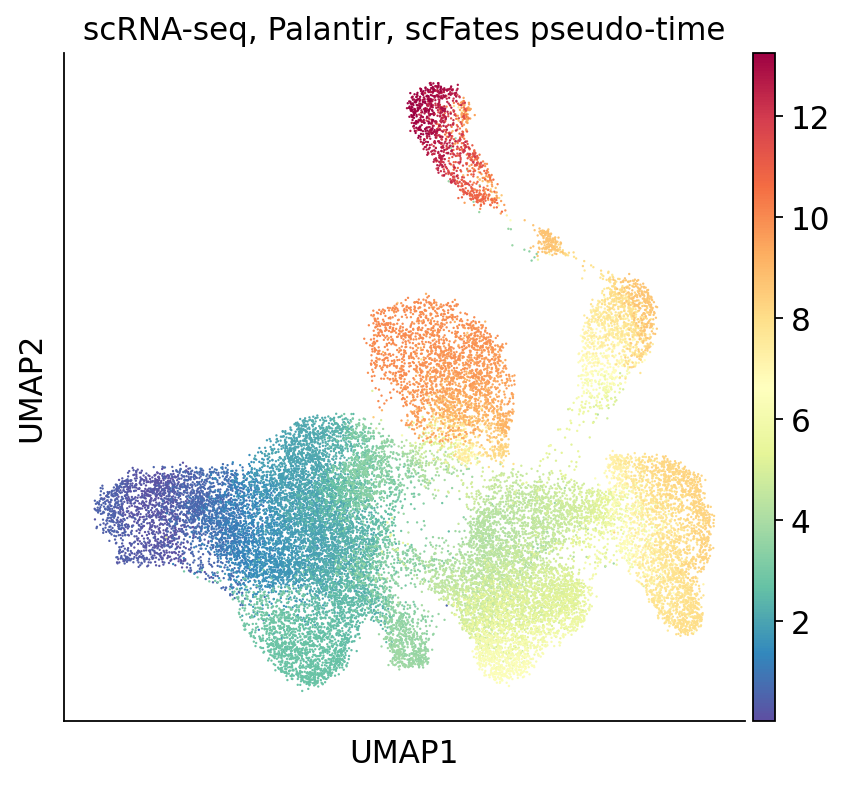

In [32]:
sc.pl.umap(rna, color=["t"],
           title="scRNA-seq, Palantir, scFates pseudo-time",
           #color_map="Spectrum_r"
           save="_ATAC_Palantir_scFates_pseudotime_oriUMAP.pdf"
)

## Dendrogram visualizations

In [33]:
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|██████████| 70/70 [01:07<00:00,  1.04it/s]
    finished (0:01:07) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


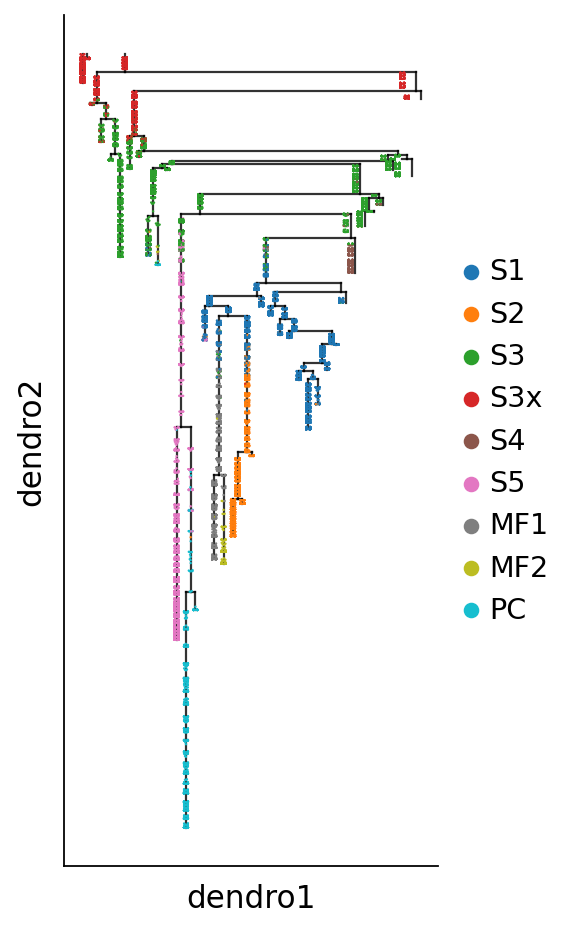

In [34]:
sc.set_figure_params(dpi_save=300, figsize=(3, 7))

scf.pl.dendrogram(adata, color="annot1", linewidth_seg=1, tree_behind=True, alpha_seg=0.8, title="", save="_ATAC_scFates.pdf")
